In [201]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from rpy2.robjects.packages import importr
import rpy2
from rpy2 import robjects
import math

import numpy as np

# imports the base module for R.
base = importr("base")
 
# imports the utils package for R.
utils = importr("utils")




df_bm_bm = pd.read_csv('C:\\Users\\smish\\Documents\\OU\\databmbm.csv', names=['Species']+list(range(10)))
df_bm_ou = pd.read_csv('C:\\Users\\smish\\Documents\\OU\\databmou.csv', names=['Species']+list(range(10)))
df_bm_ou1 = pd.read_csv('C:\\Users\\smish\\Documents\\OU\\databmou1.csv', names=['Species']+list(range(10)))


In [202]:
bm = pd.concat([df_bm_bm,df_bm_ou,df_bm_ou1], axis=0)

In [203]:
#bm = pd.concat([df_bm_bm_coal,df_ou_bm_coal,df_bm_coal_bm_coal], axis=0)

In [204]:
bm

,Species,0,1,2,3,4,5,6,7,8,9
0,sp1.sp2.sp3,(1.65509634005993;-8.8623617415209),(0.968983699228339;-8.05931174542605),(6.08847393482068;-10.8161693415661),(0.469542695161745;-6.97257891012684),(0.500074331666734;-7.06707519763984),(0.163861854648635;-5.39347561356824),(1.78915060181249;-8.97918439318037),(0.38003505497132;-6.65533527230657),(0.57505713288609;-7.27664412328694),(0.529951756612676;-7.15411901339783)
0,sp1.sp2.sp3,(63.7798881721727;-13.3657590770782),(11.8182805591679;-10.893188447324),(4.04922526103631;-10.7080765970502),(3.48405267845273;-9.11530126451693),(4.77703293360744;-9.55796655166571),(3.52638910754222;-9.04425413780424),(19.5714069367766;-11.6592486831519),(0.252513699739984;-6.54728514203195),(0.192244658972699;-7.66581087731139),(6.56471116975692;-10.0098657971053)
0,sp1.sp2.sp3,(41.3156587800871;-12.7286172466386),(23.4555808958385;-11.880624654759),(161.601010310458;-14.7719470594862),(6.89206893204993;-10.0710995663794),(11.3665158568816;-10.7969884353962),(2.2022183249078;-8.3664629275688),(59.0863331548725;-13.2554039485522),(0.25251365918911;-6.54728514285849),(0.192244624852397;-7.66581114934392),(12.6654119572512;-10.9567290314287)


In [205]:
bm['keys']= keys=['seastaR','OU+Geiger','Infering OU with Geiger']

In [206]:
#bm['keys']= keys=['Sim_BM_COAL Infer BM','Sim_BM_COAL Infer OU','Sim_BM_COAL Infer seastaR']

In [207]:
bm


,Species,0,1,2,3,4,5,6,7,8,9,keys
0,sp1.sp2.sp3,(1.65509634005993;-8.8623617415209),(0.968983699228339;-8.05931174542605),(6.08847393482068;-10.8161693415661),(0.469542695161745;-6.97257891012684),(0.500074331666734;-7.06707519763984),(0.163861854648635;-5.39347561356824),(1.78915060181249;-8.97918439318037),(0.38003505497132;-6.65533527230657),(0.57505713288609;-7.27664412328694),(0.529951756612676;-7.15411901339783),seastaR
0,sp1.sp2.sp3,(63.7798881721727;-13.3657590770782),(11.8182805591679;-10.893188447324),(4.04922526103631;-10.7080765970502),(3.48405267845273;-9.11530126451693),(4.77703293360744;-9.55796655166571),(3.52638910754222;-9.04425413780424),(19.5714069367766;-11.6592486831519),(0.252513699739984;-6.54728514203195),(0.192244658972699;-7.66581087731139),(6.56471116975692;-10.0098657971053),OU+Geiger
0,sp1.sp2.sp3,(41.3156587800871;-12.7286172466386),(23.4555808958385;-11.880624654759),(161.601010310458;-14.7719470594862),(6.89206893204993;-10.0710995663794),(11.3665158568816;-10.7969884353962),(2.2022183249078;-8.3664629275688),(59.0863331548725;-13.2554039485522),(0.25251365918911;-6.54728514285849),(0.192244624852397;-7.66581114934392),(12.6654119572512;-10.9567290314287),Infering OU with Geiger


In [208]:
robjects.r('''
library(seastaR)
library(ape)
library(dplyr)
library(gtools)
library(combinat)
library(geiger)
library(stringr)

#write.csv(df, "C:\\Users\\smish\\Documents\\OU\\datasets\\Mat.csv", row.names=TRUE,col.names = FALSE)



packageVersion("geiger")
cyp_phy <- read.tree("C:\\Users\\smish\\Documents\\OU\\tests\\/seastaR_sptree_example.txt")




species <- seastaR::parse_input_file("C:\\Users\\smish\\Documents\\OU\\tests\\/seastaR_sptree_example.txt", genetrees = FALSE)



datalist<-list("sp1", "sp2","sp3","sp4", "sp5","sp6","sp7", "sp8","sp9","sp10", "sp11","sp12","sp13", "sp14","sp15","sp16", "sp17","sp18", "sp19","sp20")
C_matrix <- ape::vcv(species) #Standard species tree matrix 


#Cstar_matrix <- seastaR::get_full_matrix(genetree_example) #Gene tree matrix 




#fit_bm <- fitContinuous(tree, states[c("sp1", "sp2","sp3")], model="BM", SE=0)

#print(fit_bm)

#aic_bm <- fit_bm$opt$aic
#siq <- fit_bm$opt$sigsq 


ee_k<-NULL

for (kk in 3:length(datalist)){

dli<-datalist[1:kk]

k<-NULL
for (i in dli){
  
    k<-c(k,i)
    
}

ee_k<-str_c(c(ee_k,str_c(c(k),collapse = "."),collapse=""))


for (i in 1:10)
{
test_trait <- seastaR::simulate_traits(1, C_matrix, 1)
df <- data.frame(test_trait)
#df <-t(df)

cyp_dat <- df


cyp_td <- treedata(cyp_phy, cyp_dat)
states <- cyp_td$data[,"test_trait"]

tree <- cyp_td$phy
states <- states[tree$tip.label]




  fit_bm <- fitContinuous(tree, states[k], model="BM")



  aic_bm <- fit_bm$opt$aic
  siq <- fit_bm$opt$sigsq 
  tmp1 <- str_c(c(",(",str_c(aic_bm),"-",str_c(siq),")"),collapse="")
  ee_k<- str_c(c(ee_k,tmp1),collapse="")

}
ee_k<- str_c(c(ee_k,"\n"),collapse="")
}
write.csv(ee_k, "C:\\Users\\smish\\Documents\\OU\\data.csv", row.names = FALSE)




        ''')



<rpy2.rinterface_lib.sexp.NULLType object at 0x000002C6340EDEC0> [RTYPES.NILSXP]

In [209]:
def fc(df):
    dic={}
    for k in range(len(df)):
        ke=[]
        for j in range(0,len(df.columns)-2):
            ke_=[float(i) for i in str(df.iloc[k][j])[1:-2].split(';')]
            ke.append(ke_)
        dic[list(bm['keys'][0])[k]]=ke
    return dic


In [210]:
def make_df(dic,df):
    result = []
    k=3
    for i in dic.keys():
        df1 =pd.DataFrame(dic[i], columns=['sig_sq','log-likelihood'])
        df1["Model"] = i
        result.append(df1)
        k=k+1
    dr = pd.concat(result)  
    return dr

def plot(dr):
    #sns.boxplot(x=dr["Model"],y=dr['aic'] )
    #plt.xticks(rotation=90)
    #plt.show()
    #plt.clf()
    
    #sns.scatterplot(x=dr["Model"],y=dr['aic'] )
    #plt.xticks(rotation=90)
    #plt.show()
    #plt.clf()
    
    sns.boxplot(x=dr["Model"],y=dr['sig_sq'] )
    plt.xticks(rotation=90)
    plt.show()
    plt.clf()
    
    sns.boxplot(x=dr["Model"],y=dr['log-likelihood'] )
    plt.xticks(rotation=90)
    plt.show()
    plt.clf()
    
    #sns.boxplot(x=dr["Model"],y=dr['log-likelihood_zero'] )
    #plt.xticks(rotation=90)
    #plt.show()
    #plt.clf()
    

In [211]:
di1 = fc(bm)
di2_11= make_df(di1,bm)


In [212]:
['seastaR','OU']

['seastaR', 'OU']

In [213]:
di1 = fc(bm)
di2_11= make_df(di1,bm)
for i,j in zip(di1['seastaR'],di1['OU+Geiger']):
    print(i[0]-j[0])

-62.12479183211277
-10.84929685993956
2.0392486737843702
-3.014509983290985
-4.276958601940707
-3.3625272528935852
-17.78225633496411
0.127521355231336
0.38281247391339096
-6.0347594131442435


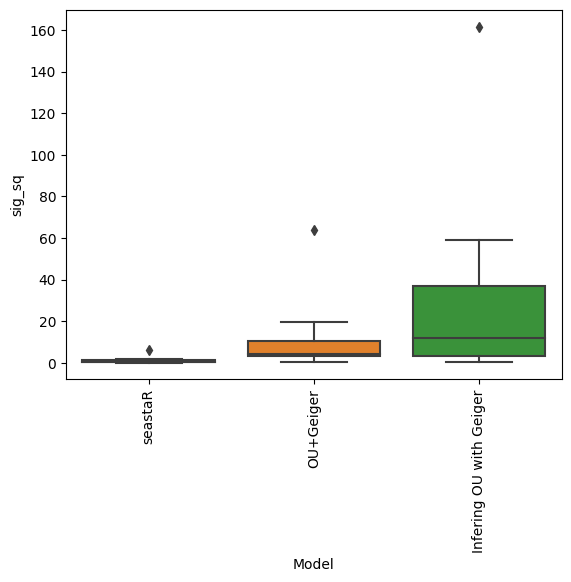

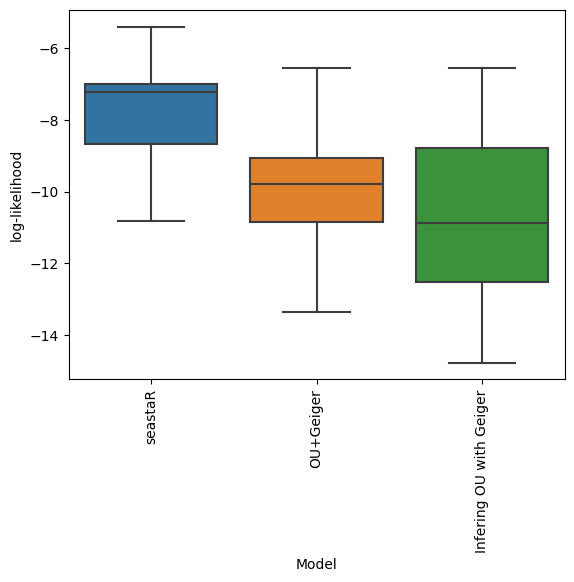

<Figure size 640x480 with 0 Axes>

In [214]:
di1 = fc(bm)
di2_11= make_df(di1,bm)
plot(di2_11)


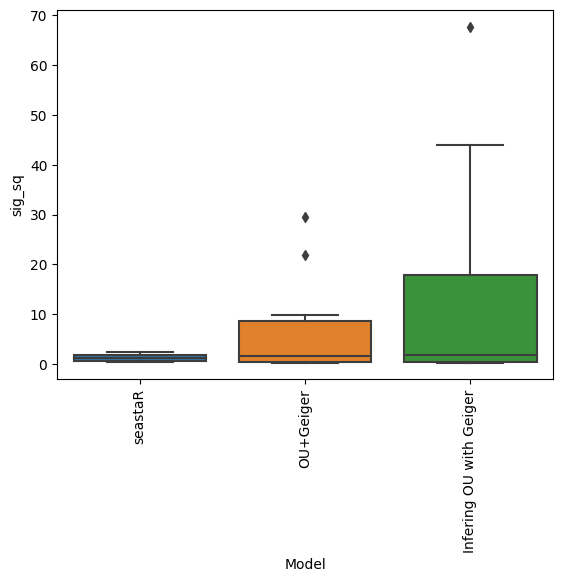

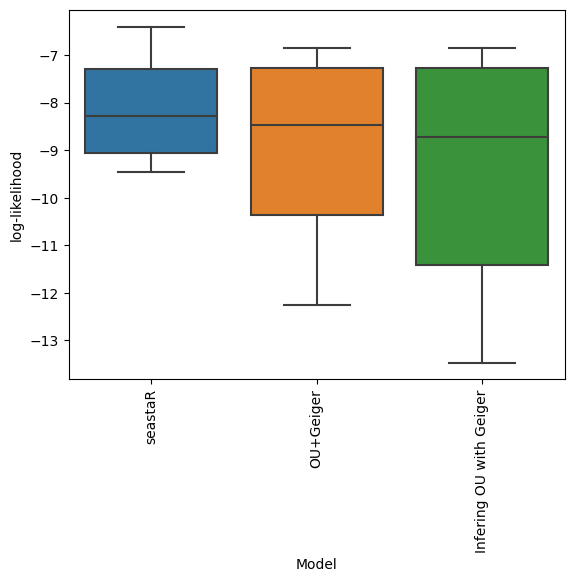

<Figure size 640x480 with 0 Axes>

In [186]:
di1 = fc(bm)
di2_11= make_df(di1,bm)
plot(di2_11)


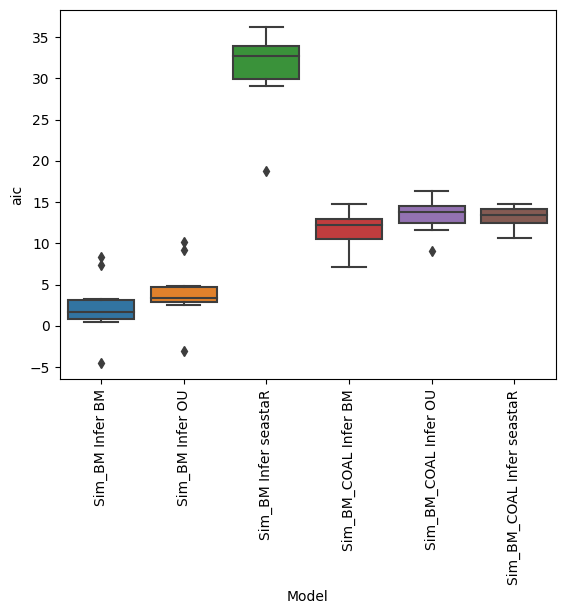

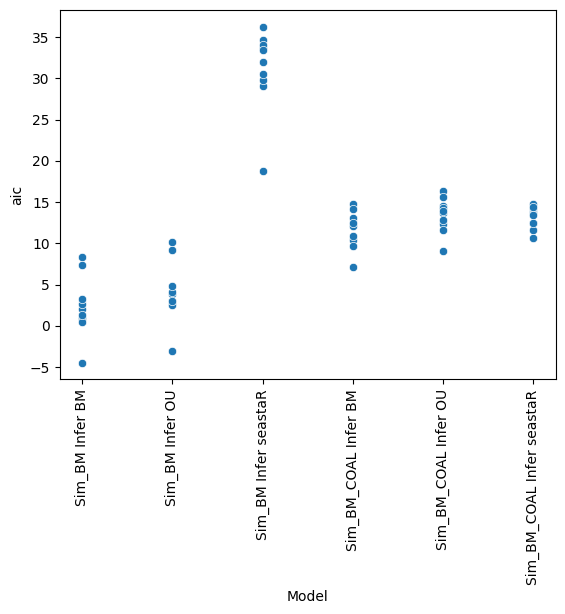

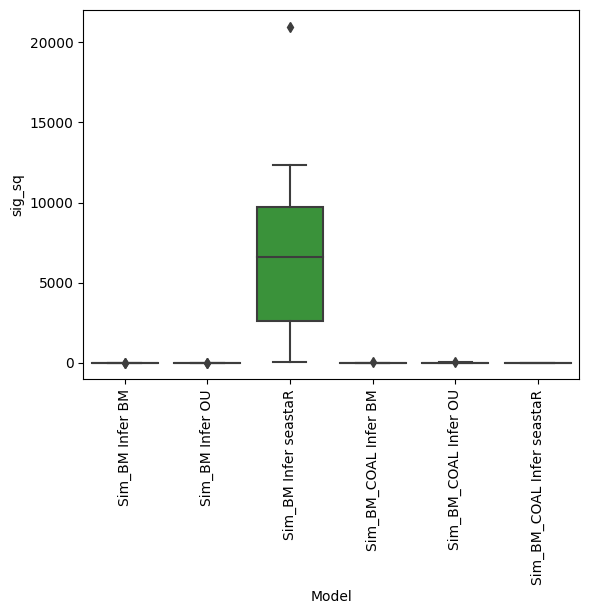

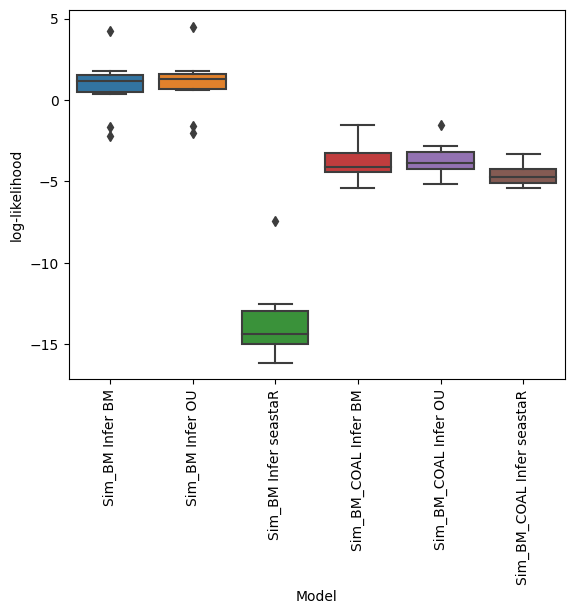

<Figure size 640x480 with 0 Axes>

In [33]:
di1 = fc(bm)
di2_11= make_df(di1,bm)
plot(di2_11)


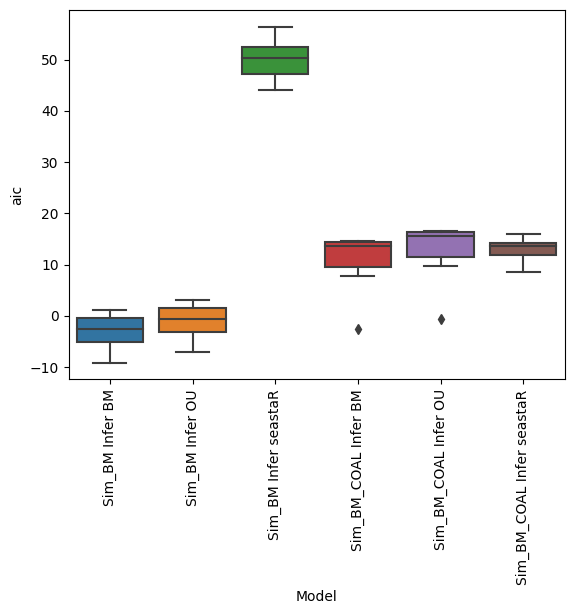

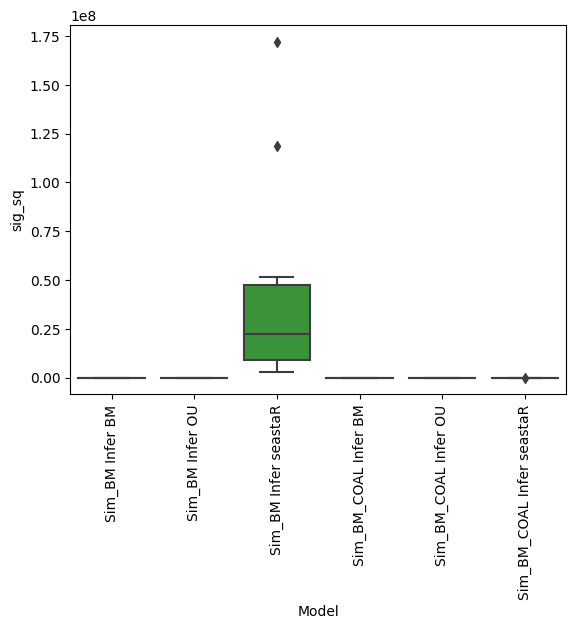

<Figure size 640x480 with 0 Axes>

In [256]:
di1 = fc(bm)
di2_11= make_df(di1,bm)
plot(di2_11)


In [167]:
di2_11

,aic,sig_sq,Model
0,12.485390,0.545165,Sim_BM Infer BM
1,16.366968,1.988126,Sim_BM Infer BM
2,9.575735,0.206687,Sim_BM Infer BM
3,12.572568,0.561240,Sim_BM Infer BM
4,15.753658,1.620534,Sim_BM Infer BM
5,16.414497,2.019875,Sim_BM Infer BM
6,8.462956,0.142633,Sim_BM Infer BM
7,8.467751,0.142861,Sim_BM Infer BM
8,14.623027,1.111687,Sim_BM Infer BM
9,11.659540,0.413975,Sim_BM Infer BM


In [168]:
dfer = pd.DataFrame()
for i in di1.keys():
    for j in di1.keys():
        ii = i.split()
        jj = j.split()
        if ii[0] == jj[0] and ii[2]!=jj[2]:
            zipped = list(zip(abs(np.subtract(np.array(di1[i]).T[0], np.array(di1[j]).T[0])),abs(np.subtract(np.array(di1[i]).T[1], np.array(di1[j]).T[1])),['_'.join(list({ii[0],ii[2],jj[2]}))]*9))
            ef1 = pd.DataFrame(zipped, columns=['aic','siq_sq','Model'])
            dfer = pd.concat([dfer, ef1], axis=0)
        #sns.boxplot(x=ef1['Model'],y=ef1['aic'] )
        #plt.xticks(rotation=90)
        #plt.show()
        #plt.clf()
    
    

In [169]:
dfer

,aic,siq_sq,Model
0,2.000000,5.708100e-09,OU_Sim_BM_BM
1,1.158142,1.284702e+01,OU_Sim_BM_BM
2,0.221385,9.219406e-01,OU_Sim_BM_BM
3,2.000000,1.361920e-09,OU_Sim_BM_BM
4,0.303678,7.474612e+00,OU_Sim_BM_BM
...,...,...,...
4,0.936360,3.512429e+01,BM_Sim_BM_COAL_OU
5,0.665123,1.014308e+01,BM_Sim_BM_COAL_OU
6,1.997386,4.980071e-02,BM_Sim_BM_COAL_OU
7,0.456409,5.716707e+00,BM_Sim_BM_COAL_OU


In [170]:
dfer

,aic,siq_sq,Model
0,2.000000,5.708100e-09,OU_Sim_BM_BM
1,1.158142,1.284702e+01,OU_Sim_BM_BM
2,0.221385,9.219406e-01,OU_Sim_BM_BM
3,2.000000,1.361920e-09,OU_Sim_BM_BM
4,0.303678,7.474612e+00,OU_Sim_BM_BM
...,...,...,...
4,0.936360,3.512429e+01,BM_Sim_BM_COAL_OU
5,0.665123,1.014308e+01,BM_Sim_BM_COAL_OU
6,1.997386,4.980071e-02,BM_Sim_BM_COAL_OU
7,0.456409,5.716707e+00,BM_Sim_BM_COAL_OU


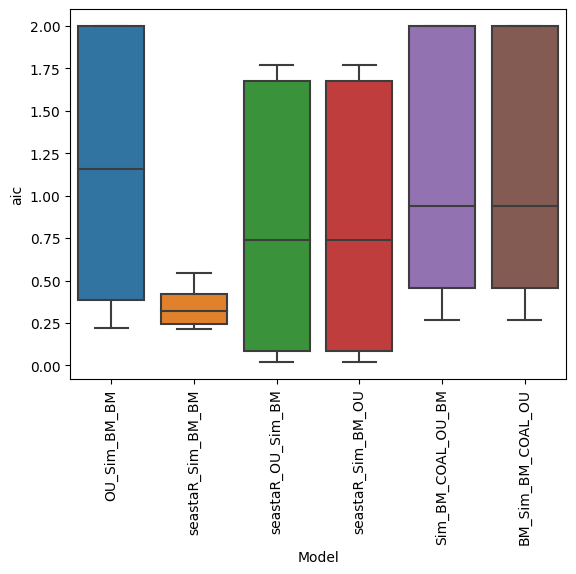

<Figure size 640x480 with 0 Axes>

In [171]:
sns.boxplot(x=dfer['Model'],y=dfer['aic'] )
plt.xticks(rotation=90)
plt.show()
plt.clf()
    

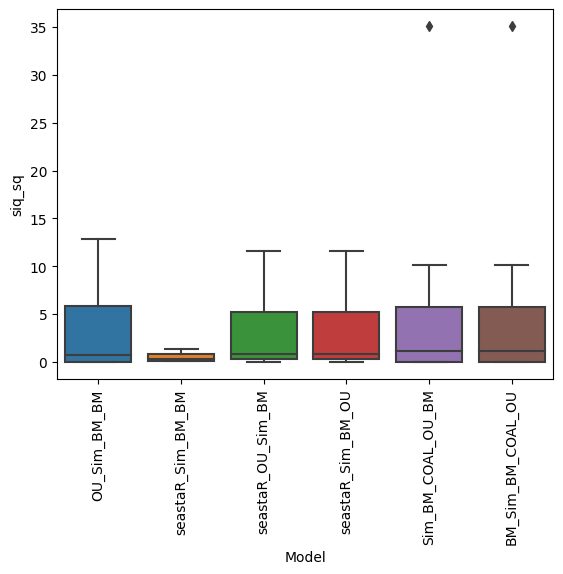

<Figure size 640x480 with 0 Axes>

In [172]:
sns.boxplot(x=dfer['Model'],y=dfer['siq_sq'] )
plt.xticks(rotation=90)
plt.show()
plt.clf()
    